# Академия Аналитиков Авито

# Эконометрика

# Домашняя работа №1

## №1 (20 баллов)

- Задача минимизации для множественной регресии выглядит вот так:
$$(Y - X\hat{\beta})'(Y - X\hat{\beta}) \rightarrow \min_{\hat{\beta}}$$
- Решите эту задачу минимизации и выведите формулу для оценок коэффициентов $\hat{\beta}$

Подозрительное задание... Но ладно...

$$(Y' - \hat{\beta}'X')(Y - X \hat{\beta}) \rightarrow \min_{\hat{\beta}}$$
$$Y'Y - Y' X \hat{\beta} - \hat{\beta}'X'Y + \hat{\beta}'X'X\hat{\beta} \rightarrow \min_{\hat{\beta}}$$

Заметиили, что $Y' X \hat{\beta} = \hat{\beta}'X'Y$, так как $(Y' X \hat{\beta})' = \hat{\beta}'X'Y$ и при этом размерность правой части: $[1 x n] [n x k] [k x 1] = [1 x 1]$. То есть это константа и поэтому $c' = c$.  

Тогда свернем в таком виде:

$$Y'Y - 2\hat{\beta}'X'Y + \hat{\beta}'X'X\hat{\beta} \rightarrow \min_{\hat{\beta}}$$

Берем производную

$$\frac{\partial e'e}{\partial \hat{\beta}} = -2X'Y + 2X'X\hat{\beta} = 0 $$
$$X'X\hat{\beta} = X'Y $$

Получаем $$\hat{\beta} = (X'X)^{-1}X'Y$$

изи изи

## №2 (40 баллов)

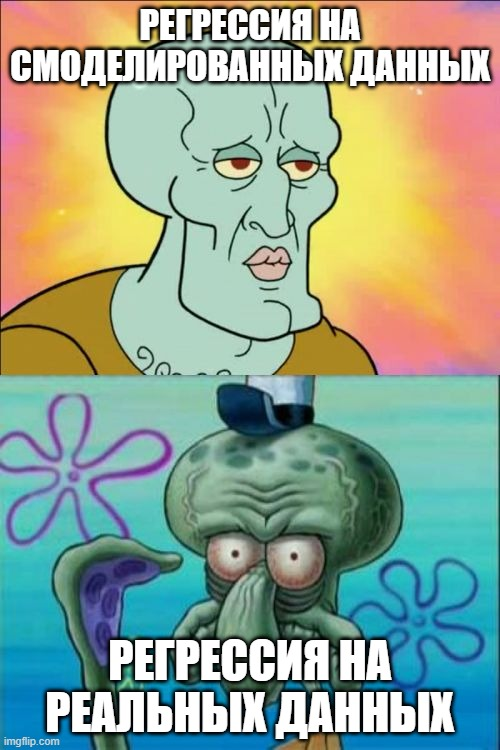

- У нас есть следующий датасет (`HW_001_001.csv`)
- Нам хочется понять, насколько уровень загрязнения воздуха (диоксид азота $NO_2$ в данном случае) влияет на результаты тестов внимания школьников. В данном домашнем задании будем смотреть на **время реакции**.
- Данные собирались в течение периода с января 2012 г. по март 2013 г. в Барселоне. В исследовании приняли участие 39 школ.
    - `react` - время реакции (ms)
    - `correct` - количество верных ответов
    - `omissions` - были ли тест не сдан
    - `no2_class` - уровень $NO_2$ в классе
    - `no2_home` - уровень $NO_2$ дома
    - `age` - возраст на момент исследования
    - `age0` - возраст поступления в школу
    - `sex` - пол
    - `grade` - класс
    - `overweight` - степень ожирения согласно ВОЗ
    - `lbweight` - весовая категория при рождении
    - `breastfeed` - продолжительность кормления грудью
    - `msmoke` - курила ли мать во время беременности
    - `meducation` - уровень образования матери
    - `feducation` - уровень образования отца
    - `siblings_old` - количество братьев\сестер старшего возраста
    - `siblings_old` - количество братьев\сестер младшего возраста
    - `sev_home` - социально-экономический индекс домашнего района
    - `green_home` - [степень озеленения домашнего района](https://earthobservatory.nasa.gov/features/MeasuringVegetation/measuring_vegetation_2.php#:~:text=Normalized%20Difference%20Vegetation%20Index%20(NDVI,up%20the%20spectrum%20of%20sunlight)
    - `noise_school` - уровень шума в школе (дБ)
    - `sev_school` - социально-экономический индекс школы
    - `precip` - осадки

In [6]:
import statsmodels.api as sm

In [16]:
import matplotlib 

In [7]:
import pandas as pd

In [25]:
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler

In [12]:
from matplotlib import pyplot as plt

In [8]:
df_matrix = pd.read_csv('HW_001_001.csv')

Перед тем как решать номер - в условии ошибка: переменная omissions это, судя по всему, количество пропущенных вопросов, а не был ли сдан тест, так как:
- эта переменная принимает значения от 0 до 50

In [9]:
df_matrix.omissions.unique()

array([ 2.,  1.,  4.,  0.,  3., 10.,  6.,  7., 19.,  5., 21., 11., 15.,
        9.,  8., 12., 35., 50., 16., 24., 28., 37., 26., nan, 13., 23.,
       18., 42.])

- половина датасета принимает значение 0

In [10]:
len(df_matrix[df_matrix.omissions == 0])

508

In [11]:
len(df_matrix[df_matrix.omissions != 0])

581

- наконец видна обратная зависимость с количеством правильных ответов

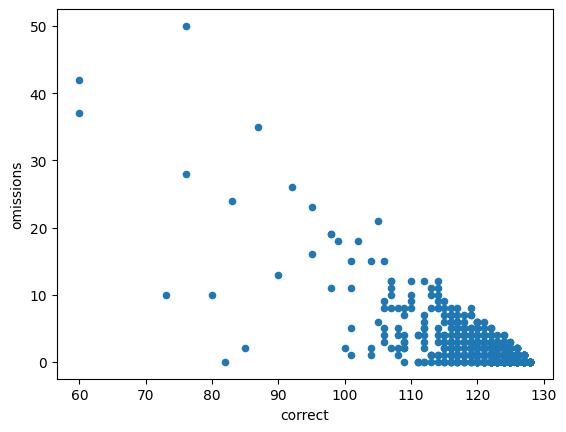

In [13]:
df_matrix.plot.scatter(x = 'correct', y = 'omissions')
plt.show()

Теперь можно переходить к решению

- Во-первых, посмотрите на описательные статистики

- Какие выводы вы можете сделать?

Посмотрим на количественные переменные

In [14]:
df_matrix.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
react,1084.0,742.480809,145.444639,434.071429,632.705707,719.478375,839.835675,1303.259843
correct,1084.0,121.826568,7.001609,60.000000,120.000000,124.000000,126.000000,128.000000
omissions,1084.0,1.728782,3.812825,0.000000,0.000000,1.000000,2.000000,50.000000
no2_class,1089.0,30.167792,9.895886,7.794096,22.818430,29.910334,36.598255,52.563970
no2_home,1089.0,54.718322,18.047859,2.076335,44.562218,54.268135,61.743267,118.656770
age,1089.0,9.087880,0.886907,7.452430,8.364134,9.067761,9.746749,11.633128
age0,1082.0,3.218022,1.293168,0.000000,3.000000,3.000000,3.000000,9.000000
siblings_old,1081.0,0.573543,0.675225,0.000000,0.000000,0.000000,1.000000,4.000000
siblings_young,1083.0,0.565097,0.690683,0.000000,0.000000,0.000000,1.000000,6.000000
sev_home,1089.0,0.419681,0.199914,0.064516,0.258064,0.387097,0.580645,0.967742


Во-первых, судя по параметру count, в датасете есть пропущенные значения. Дальше от них надо избавиться...

Во-вторых, видно что по основным переменным всё адекватно:

- Видно что данные собирались на детях 7-12 лет, поэтому и дисперсия возраста маленькая

- Скорость реакции при этом имеет гораздо большую дисперсию
- Количество правильных ответов в среднем 121, медиана 124. По этому показателю дисперсия тоже не большая
- Медиана по omissions т.е. по количеству пропущенных вопросов (а это точно пропуски, а не "был ли тест сдан") 1, а среднее 2 - скорее всего, получается так, что среднее тянут вверх выбросы - те дети, которые пропустили большое количество вопросов

И на категориальные

In [15]:
df_matrix.select_dtypes(include=['object']).describe(include="all").transpose()

,count,unique,top,freq
sex,1089,2,Male,546
grade,1089,3,2nd,412
overweight,1063,2,Normal weight,807
lbweight,1089,2,Normal birthweight,996
breastfeed,1088,3,<6 months,600
msmoke,1087,2,No smoking,1045
meducation,1089,4,University,783
feducation,1086,4,University,698


Дамми перменные из категориальных данных я буду собирать позже, пока посмотрим на такую предварительную информацию.
- Распределение полов ожидаемов :)
- Классов всего 3
- Большая часть школьников имеет нормальный вес, нормальный вес при рождении и у подавляющего большинства мама не курила

- Во-вторых, надо бы нарисовать что-нибудь
- С какой переменной вы бы начали? Какой график бы использовали?
- Нарисуйте 

Мне интуитивно кажется, что для скорости реакции и для количества правильных ответов основной объясняющей переменной должен быть не NO2, а просто возраст ребенка... Причем для скорости реакции, вероятно, зависимость обратная (ребенок старше - реакция медленнее), а для количества правильных ответов - прямая (ребенок старше - правильных ответов больше).

Ну и так как нам даны данные про загрязнение воздуха, нужно посмотреть и на график скорость реакции - NO2 в школе (т.е на момент теста).

- Какой вывод вы можете сделать?

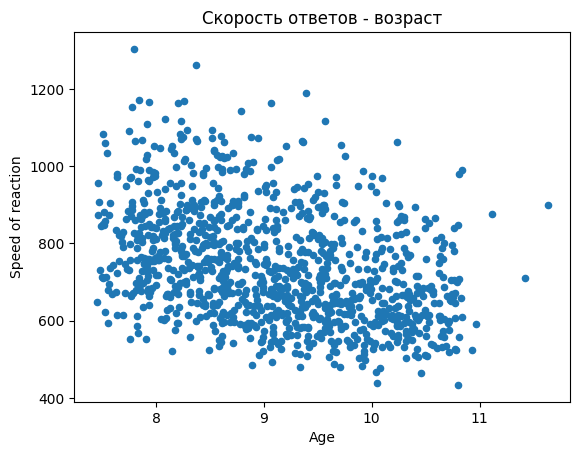

In [17]:
df_matrix.plot.scatter(x = 'age', y = 'react')
plt.ylabel("Speed of reaction")
plt.xlabel("Age")
plt.title("Скорость ответов - возраст")
plt.show()

Даже при таком первом приближении видно, что есть какая-то обратная зависимость между скоростью ответов и возрастом.

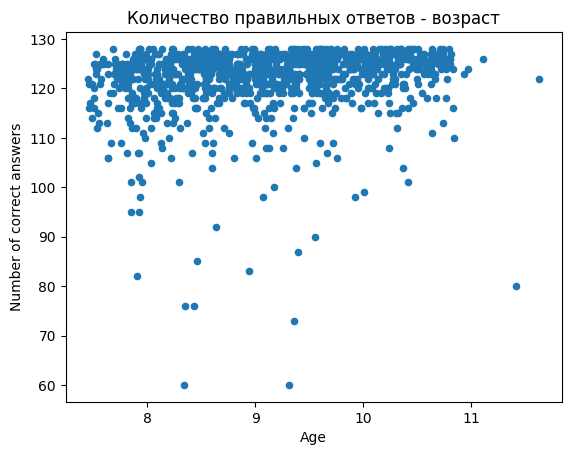

In [18]:
df_matrix.plot.scatter(x = 'age', y = 'correct')
plt.ylabel("Number of correct answers")
plt.xlabel("Age")
plt.title("Количество правильных ответов - возраст")
plt.show()

Здесь моя гипотеза совсем не подтвердилась: видимо тест был очень легкий и поэтому дети независимо от возраста одинаково хорошо отвечали :)

(ну и неудивительно, так как тест был на реакцию)

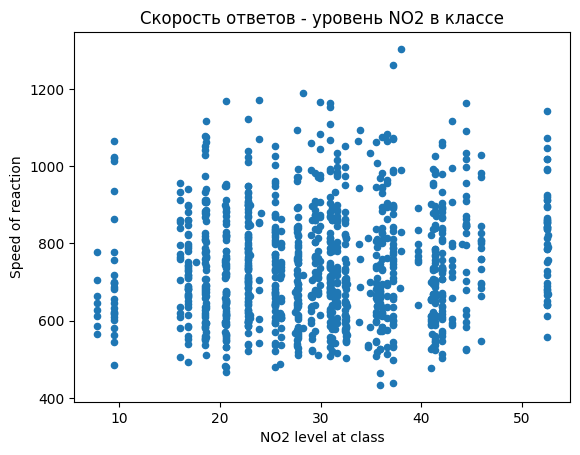

In [19]:
df_matrix.plot.scatter(x = 'no2_class', y = 'react')
plt.ylabel("Speed of reaction")
plt.xlabel("NO2 level at class")
plt.title("Скорость ответов - уровень NO2 в классе")
plt.show()

Я так просто связи здесь не вижу, но это и неудивительно - не было сделано контроля ни на возраст, ни на пол

- Теперь посмотрим на, так называемый, `heatmap`. Если простыми словами, то это просто красивая корреляционная матрица

Перед этим из категориальных данных пересоберу набор дамми-переменных

In [20]:
# Самый простой способ сделать heatmap - взять из библиотеки seaborn
import seaborn as sns

In [21]:
# я тут только смотрю на heatmap! 
# на корреляции можно смотреть и без drop_first. При подборе модели дефолтный столбец я удалю
df = pd.get_dummies(df_matrix) 
df = df.dropna()

<Axes: >

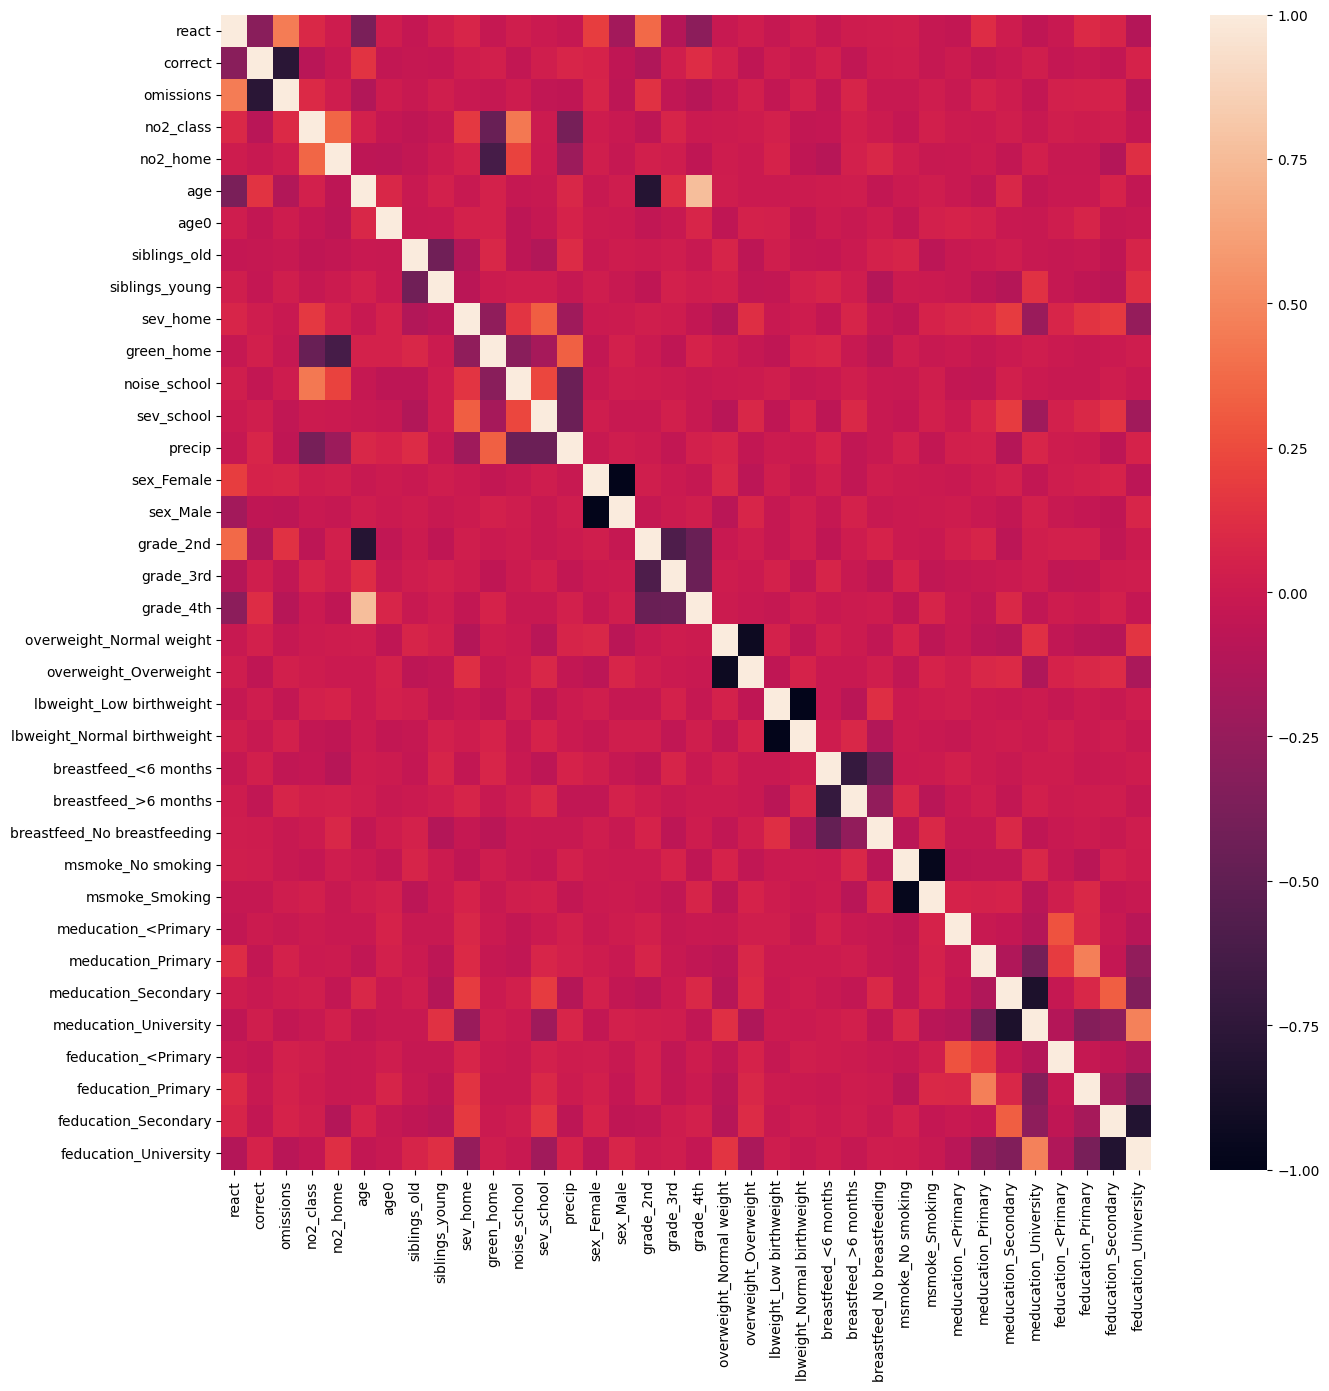

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

Чтобы не портить хитмап циферками, выведу отдельно список корреляций для reaction (мы же пытаемся объяснить время реакции)

In [23]:
df.corr().react.to_frame()

,react
react,1.000000
correct,-0.308175
omissions,0.448741
no2_class,0.093468
no2_home,0.014461
age,-0.376362
age0,0.021953
siblings_old,-0.032026
siblings_young,0.029139
sev_home,0.074493


- Какой вывод можно сделать?

Существенную положительную корреляцию react имеет с omissions - количеством пропущенных вопросов, а также с дамми-переменной, отвечающей за то, что ученик находится во втором классе (grade_2nd) - то есть самом младшем.

Наиболее существенную отрицательную корреляцию react имеет с переменной age (а также переменной grade_4th, но в действительности это один и тот же признак), а также с переменной correct. 

Также, хотя корреляции и небольшие по абсолютному значению, получается, что мужской пол имеет отрицательную связь со скоростью реакции. (Очень неожиданный результат, интуитивно кажется что у мальчиков реакция должна быть быстрее)

Получается, что возраст и количество правильных ответов отрицательно связано с скоростью реакции.

Про переменные, связанные с загрязнением воздуха ничего сказать нельзя - корреляция очень слабая. Наверное, ситуация улучшится после контроля на возраст, правильные ответы и пропуск вопросов (но я сомневаюсь :) )

- Подумайте над гипотезами о взаимосвязи между зависимой переменной и регрессорами (как переменная X *может влиять* на Y)
- Преобразуйте переменные, если необходимо
- Постройте первую версию модели

Итак, Y - скорость реакции детей

Первая гипотеза такая: 
- age влияет на скорость реакции отрицательно (чем человек старше, тем медленнее он реагирует)
- correct влияет на скорость реакции отрицательно (чем больше правильных ответов - тем больше приходится думать над каждым отдельным)
- omissions влияет на скорость реакции положительно (чем больше вопросов пропускаем - тем быстрее реакция)
- sex, судя по корреляции, должен влиять отрицательно при значении Male и положительно при значении Female. В любом случае нужен контроль на этот признак
- meducation, feducation - добавлю также все дамми-переменные, которые связаны с родительским образованием - возможно, если родитель не получил какую-то из ступеней образования, скорость реакции ребенка окажется ниже
- msmoke - добавлю, возможно, курение матери во время беременности негативно сказывается на скорости реакции детей

И самое главно

- no2_school, no2_home так как мы хотим узнать, есть ли влияние загрязнения воздуха на скорость реакции, включим собственно и его :)

In [24]:
df = pd.get_dummies(df_matrix, drop_first=True) 
df = df.dropna()
df

,react,correct,omissions,no2_class,no2_home,age,age0,siblings_old,siblings_young,sev_home,...,lbweight_Normal birthweight,breastfeed_>6 months,breastfeed_No breastfeeding,msmoke_Smoking,meducation_Primary,meducation_Secondary,meducation_University,feducation_Primary,feducation_Secondary,feducation_University
0,764.584000,125.0,2.0,16.087734,26.794014,10.340862,8.0,1.0,0.0,0.838710,...,1,1,0,0,0,1,0,0,1,0
1,855.818898,127.0,1.0,16.087734,33.398342,10.234086,3.0,0.0,1.0,0.290323,...,1,0,0,0,0,0,1,0,1,0
2,932.983051,118.0,4.0,16.087734,29.154180,9.015742,3.0,0.0,1.0,0.612903,...,1,0,0,0,0,0,1,0,0,1
3,506.440945,127.0,0.0,16.087734,25.067272,10.428473,3.0,0.0,1.0,0.483871,...,1,1,0,0,0,0,1,0,1,0
4,580.301587,126.0,0.0,16.087734,30.572056,9.330595,6.0,1.0,0.0,0.612903,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,736.968254,126.0,0.0,41.165585,55.760166,9.585216,3.0,0.0,0.0,0.645161,...,1,1,0,0,0,0,1,0,0,1
1085,696.990566,106.0,4.0,45.975480,59.031136,8.219028,3.0,2.0,0.0,0.483871,...,1,0,1,0,0,0,1,0,0,1
1086,951.915888,107.0,12.0,41.165585,64.622380,9.664614,3.0,1.0,0.0,0.483871,...,1,1,0,0,0,0,1,0,0,1
1087,971.128000,125.0,2.0,45.975480,62.968456,7.767283,3.0,0.0,1.0,0.516129,...,1,1,0,0,0,0,1,0,0,1


In [31]:
Y = df['react']
X = df[["correct", "omissions", "no2_class", "no2_home", "age", "msmoke_Smoking", "meducation_Primary", "meducation_Secondary", "meducation_University", "feducation_Primary", "feducation_Secondary", "feducation_University", "sex_Male"]]

In [38]:
X = sm.add_constant(X) 
est = sm.OLS(Y, X).fit() 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     44.63
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           4.89e-91
Time:                        22:01:22   Log-Likelihood:                -6596.8
No. Observations:                1068   AIC:                         1.322e+04
Df Residuals:                    1054   BIC:                         1.329e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   831.6979    122.425      6.794      0.000     591.473    1071.923
correct                   2.2816      0.834      2.735      0.006       0.645       3.918
omissions                17.6941      1.527     11.588      0.000      14.698      20.690
no2_class                 1.2683      0.395      3.215      0.001       0.494       2.042
no2_home                 -0.3535      0.217     -1.627      0.104      -0.780       0.073
age                     -55.5205      4.135    -13.427      0.000     -63.634     -47.407
msmoke_Smoking          -25.8444     18.646     -1.386      0.166     -62.433      10.744
meducation_Primary      102.0039     55.639      1.833      0.067      -7.171     211.179
meducation_Secondary     68.6579     55.206      1.244      0.214     -39.668     176.984
meducation_University    66.7683     55.281      1.208      0.227     -41.706     175.242
feducation_Primary       62.8893     35.825      1.755      0.079      -7.406     133.185
feducation_Secondary     52.0443     35.395      1.470      0.142     -17.409     121.498
feducation_University    33.3779     35.508      0.940      0.347     -36.296     103.052
sex_Male                -40.3498      7.336     -5.500      0.000     -54.745     -25.955
==============================================================================
Omnibus:                       37.089   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.885
Skew:                           0.389   Prob(JB):                     1.79e-10
Kurtosis:                       3.636   Cond. No.                     5.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Значима ли регрессия в целом?
- Все ли переменные значимы? Если нет, то, какие ваши дальнейшие шаги?

- Какой у вас получился $R^2, R^2_{adj}, AIC, BIC$?
- Попробуйте улучшить их

В целом регрессия значима: значение F-статистики равно 44.63, а p-value при этом $4.89*10^{-91}$, то есть на любом разумном уровне значимости регрессия в целом значима, несмотря на невысокий (0.347) скорректированный $R^2$ и большое количество незначимых (на уровне значимости 10 %) переменных

На уровне значимость 10% оказываются значимы все переменные, кроме:
- no2_home
- msmoke_Smoking
- meducation_Secondary
- meducation_University
- feducation_Secondary
- feducation_University

Получается, моя гипотеза о роли курения во время беременности не подтвердилась

Также оказывается, что из всех уровней образования значимым оказывается только переход от отсутствия образования к уровню Primary, причем у обоих родителей

И также загрязнение воздуха дома незначимо влияет на скорость реакции.

Есть некоторое количество незначимых переменных - мне кажется, можно от них избавиться. Далее постраюсь построить модель на тех же предпосылках, избавившись от лишних, незначимых на уровне 10%, переменных. 

$$ R^2 = 0.355 $$
$$ R^2_{adj} = 0.347 $$
$$ AIC = 13220 $$
$$ BIC = 13290 $$

Попробую улучшить показатели, но ориентироваться буду всё равно на AIC и BIC и общую адекватность модели. R^2 чувствителен к количеству переменных, добиться максимального значения можно если включить все переменные.

Начнем с того, чтобы исключить из модели незначимые перменные :)

In [43]:
Y = df['react']
X = df[["correct", "omissions", "no2_class", "age", "meducation_Primary", "feducation_Primary",  "sex_Male"]]

In [44]:
X = sm.add_constant(X) 
est = sm.OLS(Y, X).fit() 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  react   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     80.09
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           2.63e-93
Time:                        22:03:21   Log-Likelihood:                -6604.3
No. Observations:                1068   AIC:                         1.322e+04
Df Residuals:                    1060   BIC:                         1.326e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                913.6336    108.937      8.387      0.000     699.877    1127.391
correct                2.2687      0.837      2.710      0.007       0.626       3.912
omissions             17.8476      1.531     11.657      0.000      14.843      20.852
no2_class              1.0130      0.367      2.758      0.006       0.292       1.734
age                  -54.1374      4.119    -13.143      0.000     -62.220     -46.055
meducation_Primary    33.0797     17.550      1.885      0.060      -1.358      67.517
feducation_Primary    23.0130     15.376      1.497      0.135      -7.158      53.184
sex_Male             -41.2625      7.345     -5.618      0.000     -55.675     -26.850
==============================================================================
Omnibus:                       37.854   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.067
Skew:                           0.384   Prob(JB):                     6.02e-11
Kurtosis:                       3.684   Cond. No.                     3.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- По какой метрике вы бы решали, что ваша регрессия улучшилась?

- Наблюдаем, что p-value F-статистики стало меньше. Можно сказать, что вероятность того, что наша регрессия в целом значима, стала больше.

- $R^2$ и $R^2_{adj}$ стали меньше :) ну неудивительно, ведь регрессоры я исключила

- AIC не изменился
- BIC упал, можно сказать что регрессия улучшилась...

ну штош...

Мы же не на курсе по машинному обучению! 
Главное что все параметры теперь значимы, регрессия в целом значима, а еще она имеет экономический смысл 😎

# №3 (40 баллов)

- Ладно, пришла пора для чего более сложного
- В этой задаче вы сами все решаете. Более того, у вас будут даже чужие ноутбуки
- Если вы проведете такой же анализ, что и выше, то балл за это задание будет равен 10/40
- Чтобы получить максимальный балл за это задание, то вам нужно будет провести полноценное исследование

- Итак, представьте себе следующую ситуацию
- Вы участвуете в создании продукта/модели по оценке стоимости недвижимости в стартапе 
- Вы - главный аналитик, который отвечает за создание модели и презентацию ее результатов
- Проблема в том, что вы единственный аналитик в команде. Все остальные члены команды **не имеют математического бэкграунда, они не знают никаких моделей, они никогда не занимались программированием**. Зато они очень хорошо разбираются в бизнесе
- Вы знаете, что для тестривания модели на первом этапе подойдет [этот](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) замечательный датасет (`HW_001_002.zip`). Там есть примеры различного анализа и моделей
- Но вы не можете просто взять примеры оттуда:
    - Во-первых, ваша модель должна быть линейной (хотя бы на первых порах, в будущем, после курса по ML, можете брать и нелинейные модели)
    - Во-вторых, ваша цель не просто предсказание цены на ту или иную недвижимости, а **описание механизма ценообразования на рынке**
    - В-третьих, вашей команде очень важно, чтобы результаты модели были адекватными. **За каждой из включенных переменных должна стоять гипотеза о том, почему эта переменная влияет на цену**. Значимость переменной не является достаточным объяснением о включении переменной в конечную модель
- Помните, что это лишь первая версия модели. Основая цель для текущего анализа - это понимание того, 
    - какие данные есть, 
    - как они "выглядят", 
    - какая получается модель, 
    - какие выводы можно сделать, 
    - насколько эти выводы адекватны и соответствуют вашим гипотезам,
    - как можно еще улучшить модель
- Еще важный момент. Вы отправите, получившееся исследование команде, поэтому оно не должно быть большим (время на прочтение и понимание того, что происходит, не должно занимать более 10-15 минут). Помните, что у команды есть и другие задачи, поэтому позаботьтесь, чтобы исследование было:
    - Структурированным. Можете использовать [классический](https://blogs.lse.ac.uk/impactofsocialsciences/2018/05/21/writing-a-page-turner-how-to-tell-a-story-in-your-scientific-paper/) подход к научному исследованию и добавить то, как делают [консультанты](https://strategyu.co/mckinsey-structured-problem-solving-secrets/)
    - Отвечало на поставленную задачу
    - Было самодостаточным (в одном jupyter файле, проще говоря)
    - Воспроизводимым (не будет `seed`, если/где надо, будет 0 за это задание)
    - Было не стыдно показать CEO и др. в стартапе (если графики будут без подписей осей и названия, как минимум, будет 0)

In [54]:
df_matrix = pd.read_csv('train.csv')

### 1) Посмотрим, какие данные насобирала наша команда для модели ценообразования 

##### Summary

- наш датасет достаточно большой, в нем есть категориальные данные и числовые
- есть большое количество пропущенных значений, от которых я успешно избавилась
- согласно корреляционному анализу, значимая положительная корреляция: OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF

- значимая отрицательная корреляция:ExterQual_TA, KitchenQual_TA, BsmtQual_TA, GarageType_Detchd, GarageFinish_Unf

-----------------------------------------------------------------------------------------------------------

Узнаем размерность исходного датасета

In [55]:
df_matrix.shape

(1460, 81)

Посмотрим с чем мы вообще имеем дело, какие данные насобирали

In [56]:
df_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Для начала данные нужно почистить от пропусков. Причем тут просто выкинуть строки с пропусками не получится - хотя наблюдений достаточно, есть категории, в которых вообще по всем наблюдениям значение отсутсвует.
Посмотрим на распределение пропусков

In [57]:
x = df_matrix.isna().sum().to_frame()
x.columns = ['TEST']

In [58]:
x[x["TEST"] > 0]

,TEST
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


Колонки Alley, FireplaceQu, PoolQC, Fence, MiscFeature я удалю полностью. Если обычно такие данные недоступны и их нам не удалось собрать - нам нет смысла опираться на них при выборе модели ценообразования. Удалим лишние колонки и строки с пропусками

In [59]:
df = df_matrix.drop(columns=["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature", "Id"])

In [60]:
df = df.dropna()

In [61]:
df.shape

(1094, 75)

Посмотрим на значения целевой переменной и ее распределение

In [62]:
df["SalePrice"].describe()

count      1094.000000
mean     187033.263254
std       83165.332151
min       35311.000000
25%      132500.000000
50%      165750.000000
75%      221000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5, 0.98, 'Распределение целевой переменной')

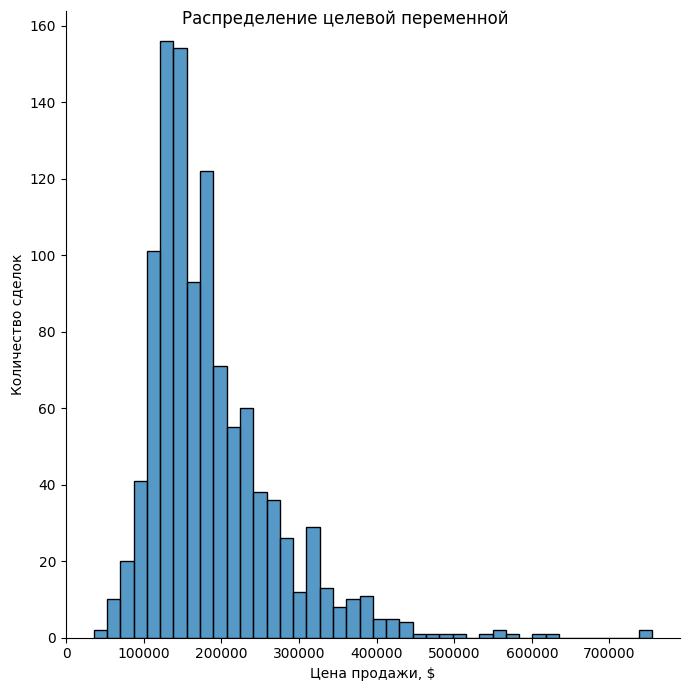

In [63]:
g = sns.displot(df["SalePrice"], height=7)
g.set_axis_labels("Цена продажи, $", "Количество сделок")
g.figure.suptitle("Распределение целевой переменной")

Если цены в долларах, то они вполне правдоподобны.

Средняя цена продажи составляет 18703$

Дополнительно посмотрим на heatmap, чтобы выделить потенциально важные для модели факторы

/tmp/ipykernel_22762/1778907887.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: title={'center': 'Heatmap'}>

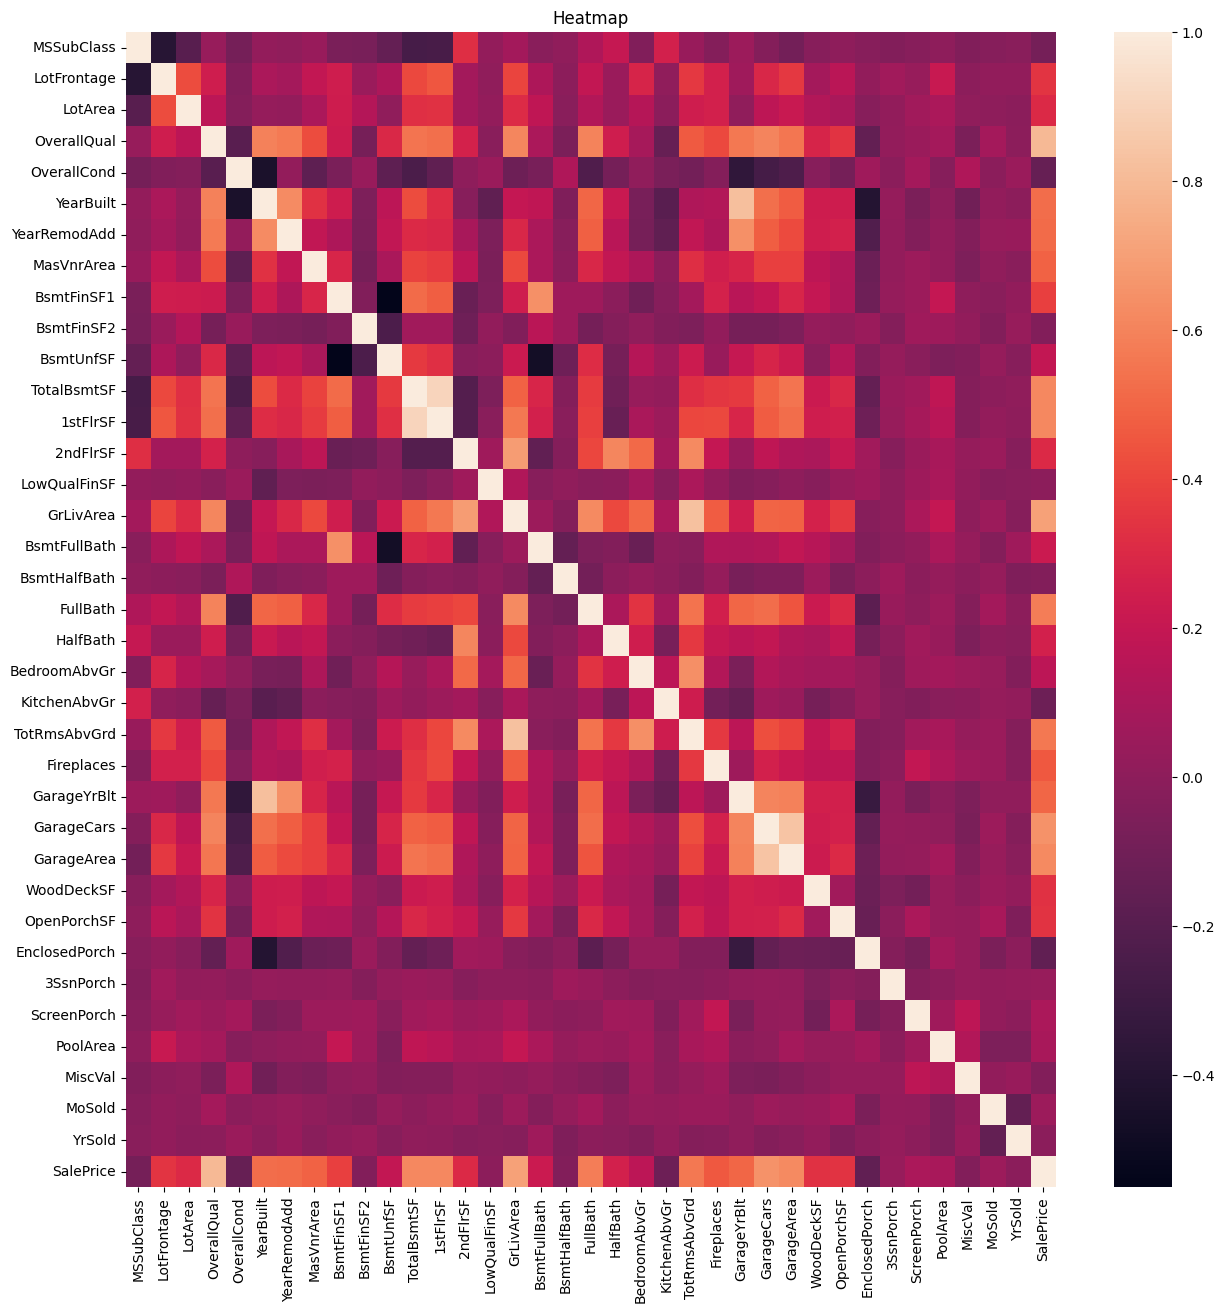

In [64]:
plt.figure(figsize=(15,15))
plt.title("Heatmap")
sns.heatmap(df.corr())

Нас интересуют факторы, которые могут иметь значение для объяснения дисперсии переменной SalePrice. Посмотрим на корреляции именно с этой переменной. Я не стала добавлять на график выше дамми-переменные, но ниже, при подсчете корреляции, я добавлю их - вдруг появятся какие-то интересные закономерности

In [65]:
df_with_dummies = pd.get_dummies(df)

10 переменных, имеющих наибольшую обратную связь с ценой, если судить по корреляции.

In [66]:
df_with_dummies.corr().SalePrice.to_frame().sort_values(by=["SalePrice"], ascending=True).head(10)

,SalePrice
ExterQual_TA,-0.605346
KitchenQual_TA,-0.537959
BsmtQual_TA,-0.508959
GarageFinish_Unf,-0.504576
GarageType_Detchd,-0.411295
Foundation_CBlock,-0.390386
MasVnrType_None,-0.381164
HeatingQC_TA,-0.338621
BsmtExposure_No,-0.329762
LotShape_Reg,-0.323333


Здесь я сразу отмечу, что ExterQual_TA, KitchenQual_TA, BsmtQual_TA - дамми-переменные, созданные на основании шкалы  "Ex = Excellent, Gd = Good , TA = Typical, Fa = Fair". То есть, если покупатели наблюдают типичный экстерьер, типичную кухню или типичный подвал, они склонны платить за этот дом меньше.

Несмотря на то, что Typical это не самая плохая категория - она самая распространненная, и за нее покупатель, вероятно, доплачивать не готов

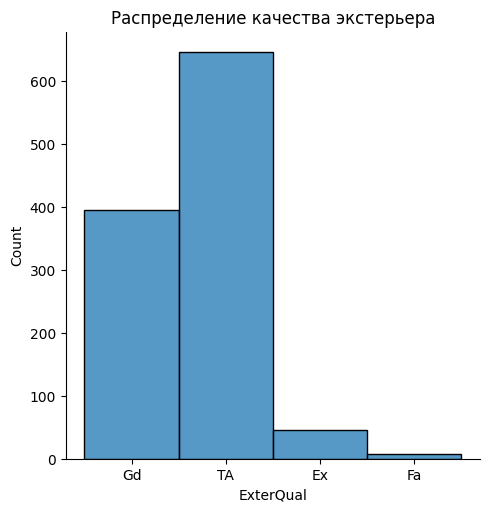

In [67]:
 sns.displot(df["ExterQual"]).set(title="Распределение качества экстерьера")

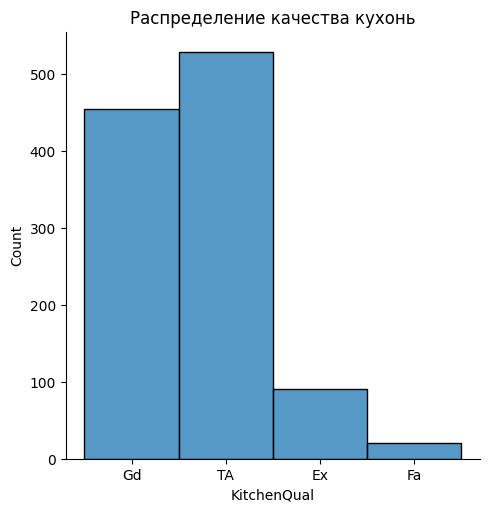

In [68]:
 sns.displot(df["KitchenQual"]).set(title="Распределение качества кухонь")

Аналогичная ситуация с Detached т.е. отдельно стоящими гаражами (переменная GarageType)  - эта категория достаточно частая, но при этом покупатель не готов за нее доплачивать. Появляется отрицательное влияние на цену.

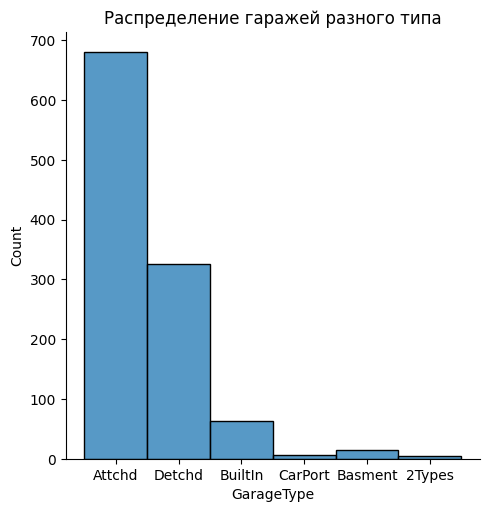

In [69]:
 sns.displot(df["GarageType"]).set(title="Распределение гаражей разного типа")

Наконец посмотрим на GarageFinish - тут довольно очевидно, что отсутствие достроенного гаража тянет цену вниз

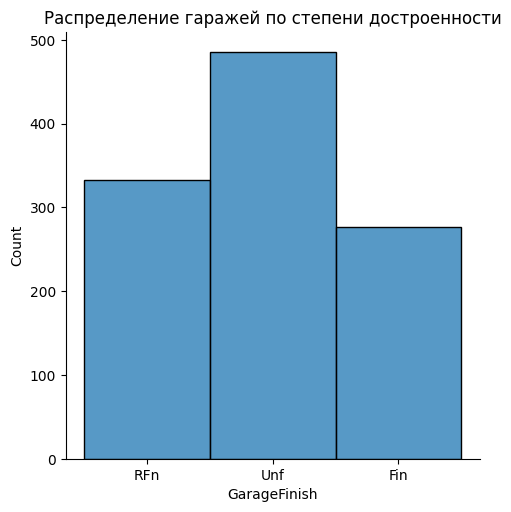

In [70]:
sns.displot(df["GarageFinish"]).set(title="Распределение гаражей по степени достроенности")

10 переменных, имеющих наибольшую прямую связь с ценой, если судить по корреляции.

In [71]:
df_with_dummies.corr().SalePrice.to_frame().sort_values(by=["SalePrice"], ascending=False).iloc[1:].head(10)

,SalePrice
OverallQual,0.795437
GrLivArea,0.707481
GarageCars,0.652103
GarageArea,0.620772
TotalBsmtSF,0.617741
1stFlrSF,0.617692
BsmtQual_Ex,0.580979
FullBath,0.578299
TotRmsAbvGrd,0.560521
KitchenQual_Ex,0.535441


Факторы, которые хотелось бы отметить на этом шаге (первые 5 в категории прямой и обратной связи с ценой):
- значимая положительная корреляция: OverallQual: общее качество материала и отделки, GrLivArea: жилая площадь над землей в квадратных футах, GarageCars: Размер гаража по количеству автомобилей, GarageArea: Размер гаража в квадратных футах, TotalBsmtSF: Размер подвала в квадратных футах, 1stFlrSF: Размер первого этажа в квадратных футах

- значимая отрицательная корреляция: я бы выделила выше указанные дамми-переменные ExterQual_TA, KitchenQual_TA, BsmtQual_TA, GarageType_Detchd, GarageFinish_Unf

### 2) Механизм ценообразования на американском рынке жилья

##### Summary

- Обычно в таких моделях выделяются наборы факторов, которые отвечают за качетсво самого дома, качество локации и качество потенциальных соседей
- Однако наш датасет собран по Бостону, в котором проживает всего 660 тысяч человек, и мы можем сфокусироваться преимущественно только на качествах самого дома
- Модель на которой я остановилась:
    - эндогенная переменная: SalePrice
    - экзогенные переменные: GrLivArea, YearBuilt, GarageCars, FullBath, ExterQual_TA, KitchenQual_TA, GarageFinish_Unf, GarageType_Detchd

-----------------------------------------------------------------------------------------------------------

Наша цель - не просто обучить модель очень хорошо предсказывать цену на жилье, а построить осмысленную модель. Поэтому обратимся к классическим работам по ценообразованию на (американских) рынках жилья.

Если очень коротко, то во всех моделях есть примерно следующие наборы\группы факторов:
- географический фактор (город, район города, расстояние от ближайшей крупной магистрали, расстояние до ближайшей больницы и т.п.)
- фактор "самого дома" (площадь, количество этажей, количество спален, год постройки, материал, качество крыши, наличие гаража и т.п.) 
- фактор социальной среды (соседи, насколько район благополучный и безопасный)

Однако дальше модели, их оценки и результаты могут существенно различаться в зависимости от конкретного населенного пункта, страны, культуры.


Источники (особенно часть про обзор литературы):

https://sciendo.com/pdf/10.2478/bjreecm-2018-0017

https://www.scitepress.org/Papers/2018/100743/100743.pdf

https://www.researchgate.net/publication/346248857_Determinant_Factors_of_House_Price_Using_Regression_Analysis

Однако в нашем случае мы ограничены одним единственным городом (Бостон), в котором проживает всего 660 тысяч человек. Поэтому в нашей модели мы сделаем упор на качество самого дома, пренебрегая качеством потенциальных соседей, но постараемся учесть географическое расположение, насколько это возможно.

По третьей ссылке доступные исследователям данные также были в основном данными о самом доме (и это исследование как раз касается ценообразования на рынке жилья отдельного среднего города).
Ключевые параметры, которые объясняли большую часть дисперсии цены, это:
- **Площадь дома**
- **Площадь участка**

- Количество спален и ванн
- Электрификация
- Гараж
- Материал крыши

(Первые два параметра помечены жирным, так как это ключевые параметры, которые объясняли наибольшую долю дисперсии в обоих городах исследования)

Вооружившись этими фундаментальными знаниями и анализом корреляционной матрицы, я предлагаю следующую модель:

- Переменные, имеющие положительное влияние на цену:
    - GrLivArea - площадь дома над землей. Я предполагаю, что это один из ключевых факторов, который строго положительно будет влиять на цену. Это соотносится с предложенными выше ресерчами и здравым смыслом
    - YearBuilt - год постройки. Я думаю здесь зависимость будет не линейной (скорее сложной и подковообразной), но новые дома будут в среднем стоить дороже, чем старые
    - GarageCars - размер гаража по количеству автомобилей. Связь будет положительной, так как это оказалось существенным фактором при выборе дома, судя по корреляционной матрице
    - FullBath - количество ванных комнат в доме. Этот фактор выделяют в ресерчах на эту тему, также он оказался важным согласно нашей корреляционной матрице
- Переменные, имеющие отрицательное влияние на цену:
    - ExterQual_TA - дамми переменная, которая равна единице, если экстерьер дома оценивается как средний. Красивый внешний вид дома располагает покупателей, а за средний дом они не готовы переплачивать
    - KitchenQual_TA - дамми переменная, которая равна единице, если кухня дома оценивается как средняя. Логика аналогична.
    - GarageFinish_Unf - дамми переменная, которая равна единице, если гараж не достроен на момент продажи. Имеет отрицательное влияние так как гараж при покупке дома оказался очень важным фактором
    - GarageType_Detchd - дамми переменная, если гараж в предлагаемом лоте типа Detached. Судя по данным, за этот тип гаража потребитель не готов платить больше.
    
- Я осознанно не включаю перемененные в духе OverallQuality - по факту это прокси от других переменных в модели. Сложно понять как его оценивали, если мы не знаем итоговую оценку. Также включение этого фактора может привести к мультиколлинеарности

### 3) Оценка модели

##### Summary

- $R^2$ и $R^2_{adj}$ = 0.7
- в целом регрессия значима
- большая часть переменных ведет себя так, как предполагалось в прошлом пункте
- проблема есть только с переменной количества ванных комнат - в дальнейшем ее лучше исключить

-----------------------------------------------------------------------------------------------------------

In [78]:
df_with_dummies = pd.get_dummies(df, drop_first=True)

In [79]:
Y = df_with_dummies["SalePrice"]
X = df_with_dummies[["GrLivArea", "YearBuilt", "GarageCars", "FullBath", "ExterQual_TA","KitchenQual_TA", "GarageFinish_Unf", "GarageType_Detchd"]]

In [86]:
X = sm.add_constant(X) 
est = sm.OLS(Y, X).fit() 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     324.3
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          1.73e-281
Time:                        22:09:39   Log-Likelihood:                -13277.
No. Observations:                1094   AIC:                         2.657e+04
Df Residuals:                    1085   BIC:                         2.662e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -8.79e+05   1.47e+05     -5.980      0.000   -1.17e+06   -5.91e+05
GrLivArea            80.2189      3.721     21.559      0.000      72.918      87.520
YearBuilt           473.6358     74.052      6.396      0.000     328.334     618.938
GarageCars         2.675e+04   2853.059      9.374      0.000    2.11e+04    3.23e+04
FullBath          -1.109e+04   3701.433     -2.997      0.003   -1.84e+04   -3830.273
ExterQual_TA      -1.762e+04   4483.099     -3.931      0.000   -2.64e+04   -8828.039
KitchenQual_TA    -1.605e+04   3881.192     -4.136      0.000   -2.37e+04   -8435.178
GarageFinish_Unf  -7826.9077   4051.323     -1.932      0.054   -1.58e+04     122.408
GarageType_Detchd -8333.9351   4048.868     -2.058      0.040   -1.63e+04    -389.437
==============================================================================
Omnibus:                      304.270   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8778.464
Skew:                           0.640   Prob(JB):                         0.00
Kurtosis:                      16.818   Cond. No.                     2.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Перейдем к выводам.
1) $R^2$ и $R^2_{adj}$ достаточно хорошие (0.7), то есть предложенная модель обладает достаточной объясняющей силой для цены квартиры
2) p-value у F-статистики достаточно мал, чтобы модель была значима на любом разумном уровне
3) На уровне значимости 10 процентов все выбранные переменные оказываются значимы

Соотнесем коэфициенты перед регрессорами - то есть посмотрим, где наша гипотеза относительно связи фактора и цены на квартиру подтвердилась, а где нет

Регрессор | Предполагали влияние на цену квартир | Оказалось влияние на цену квартир
---|---|---
Общая жил площадь | положительное | положительное
Год постройки | положительное | положительное
Вместимость гаража | положительное | положительное
Количество ванных | положительное | отрицательное
"Средняя" кухня | отрицательное | отрицательное
"Средний" экстерьер | отрицательное | отрицательное
Недостроенный гараж | отрицательное | отрицательное
Отдельно стоящий гараж | отрицательное | отрицательное

Все гипотезы относительно влияния переменных подтвердились, кроме того, что количество ванных комнат, в текущей версии модели, отрицательно влияет на цену. Я думаю, здесь очевидная проблема мультиколлинеарности с фактором общей жилой площади, и в следующей версии модели этот параметр нужно было бы исключить.

Я думаю, что результат в целом не плохой, но можно было бы большее внимание удалить техническим характеристикам - качеству подвала, фундамента, крыши - эти переменные, судя по теории и здравому смыслу, должны также существенное влияние иметь на цену дома, и при этом они, насколько я могу судить, не должны иметь линейную связь с другими параметрами модели.

# №4 (20 баллов)*  
- Это задание со звездочкой
- Баллы за это задание идут как дополнительные баллы
- Общий балл за это домашнее задание не может превышать 100 баллов
- Например, если за предыдущие 3 задания было набрано 100 баллов и за это задание набрано 20 баллов, то итоговый балл будет 100 баллов. Если же за предыдущие 3 задания было набрано 90 баллов и за это задание набрано 20 баллов, то итоговый балл все равно будет 100 баллов

- В далеком XIX веке в Лондоне была эпидемия холеры
- В те времена считалось, что холера передается воздушно-капельным путем
- Но один ученый заподозрил, что это не так. Кол-во заболеваний не уменьшалось при соблюдении всех мер предосторожности при такой передаче заболевания
- Ученого звали John Snow ([Snow 1855](https://mixtape.scunning.com/references.html#ref-Snow1854))
- Разберем его идею к дизайну эксперимента 

**Нулевая гипотеза: холера передается водоснабжением**

- Как бы это проверяли, если бы имели бесконечные ресуры? Опишите идеальный эксперимент.

- Но такого сделать мы, конечно, не можем. Однако у нас есть следующая информация
- В 1800-х несколько водоснабжающих компанй обслуживали город. Они все брали воду из Темзы, которая, если верить нашей гипотезе, была зараженной
- Но в 1849 компания Lambeth передвинула свои трубу выше по течению, а компании Southwark и Vauxhall Waterworks Company нет
- Как бы нам это использовать для проверки нашей гипотезы?

Мы можем ввести контрольную переменную на разницу между компаниями, а также считать компанию Southwark и Vauxhall как бейзлайн для Lambeth

- Ниже представлена таблица со смертностью в 1849 г. и 1854 г. для потребителей двух разных компаний

|Компания\Год|1849|1854|
|---|---|---|
|Southwark and Vauxhall|135|147|
|Lambeth|85|19|

- Пусть $Y$ - это смертность
- Пусть $D$ - это влияние чистой воды на смертность от холеры (очевидно, если нулевая гипотеза верна, то это влияние отрицательное)
- Пусть $L$ и $SV$ - это фиксированный эффект\влияние специфичный для каждой из компаний Lambeth и Southwark and Vauxhall, соответственно. Например, у них могут быть разные трубы и\или системы очистки воды

|Компания|Результат|
|---|---|
|Southwark and Vauxhall|$$Y=SV$$|
|Lambeth|$$Y=L+D$$|

- Почему мы не можем просто вычесть из результата Lambeth результат Southwark and Vauxhall?

Потому что возможно, между этими двумя компаниями, есть другие факторы, которые влияют на смертность от холеры, не только разница в водопроводе, но и что-то еще. (То есть между SV и L есть какая-то фундаментальная разница)

- Однако, у нас еще есть временные данные
- Пусть $T$ - это некий временной эффект

|Компания|Время|Результат|
|---|---|---|
|Lambeth|До|$$Y=L$$|
||После|$$Y=L+D+T$$|

- Как будет выглядеть эта табличка для Southwark and Vauxhall?
- Чему будет равно $D$ на тех данных, что были выше?

|Компания|Время|Результат|
|---|---|---|
|Southwark and Vauxhall|До|$$Y=SV$$|
||После|$$Y=SV+T$$|

$D = - (147-135) - (19-85) = -78$

- То, что вы проделали выше называется `DiD` (difference in differences). Это замечательный метод, который позволяет вам контролировать эффект от эксперимента (`treatment`) на какие-то другие переменные
- Он, отнюдь, не ограничивается временным эффектом, но для простоты задания не будет заходить дальше
- Давайте немного формул для понимания того, что было вами проделано. 
    - Вы нашли `D` - эффект, который оказала чистая вода на смертность от холеры. В идеальном мире, мы с вами бы его считали, как $E[Y_{T=1, S=1} - Y_{T=1, S=0}]$, т.е. уровень смертности в один и тот же момент времени ($T=1$) для контрольной ($S=0$) и тестовой ($S=1$) групп. Но, такое не всегда, мягко говоря, возможно.
    - Поэтому вам пришлось изхищряться, чтобы вычленить временной эффект, т.е. вы считали:
    $$D = (E[Y_{T=1}|S=1] - E[Y_{T=0}|S=1]) - (E[Y_{T=1}|S=0] - E[Y_{T=0}|S=0])$$
    - Это, конечно, замечательное число, но значимо ли оно? На этот вопрос нам с вами поможет ответить, в частности, простая линейная регрессия с дамми/бинарными переменными: $\hat{y} = \hat{\beta_0} + \hat{\beta_1} \cdot T + \hat{\beta_2} \cdot S + \hat{\beta_3} \cdot T \cdot S$
    - Если мы с вами посмотрим на $\beta_0$, то при $T=0, S=0 \rightarrow \hat{y} = \hat{\beta_0} \rightarrow E[y|T=0, S=0] = \hat{\beta_0}$ 
    - Хм, а если у нас $T=1, S=0 \rightarrow \hat{y} = \hat{\beta_0} + \hat{\beta_1} \rightarrow \hat{\beta_1} = \hat{y} - \hat{\beta_0} = E[y|T=1, S=0] - E[y|T=0, S=0]$
    - А если $T=0, S=1 \rightarrow \hat{y} = \hat{\beta_0} + \hat{\beta_2} \rightarrow \hat{\beta_2} = \hat{y} - \hat{\beta_0} = E[y|T=0, S=1] - E[y|T=0, S=0]$
    - А если 
    $$T=1, S=1 \rightarrow \hat{y} = \hat{\beta_0} + \hat{\beta_1} + \hat{\beta_2} +\hat{\beta_3} \rightarrow \\
    E[y|T=1, S=1] = E[y|T=0, S=0] + (E[y|T=1, S=0] - E[y|T=0, S=0]) + (E[y|T=0, S=1] - E[y|T=0, S=0]) +\hat{\beta_3} \rightarrow \\
    \hat{\beta_3} = (E[y|T=1, S=1] - E[y|T=0, S=1]) - (E[y|T=1, S=0] - E[y|T=0, S=0])$$
    - А вот и наш эффект, который мы так хотели посчитать и проверить на стат. значимость. Думаю, что вы уже знаете, как проверять стат. значимость коэффициентов линейной регрессии.

- Перейдем к чему-то с данными
- Надо понять маркетинговый эффект от рекламы на билбордах на увеличение депозитов ($\text{deposits}$) с мая ($JUL = 0$) по июль ($JUL = 1$)
- Всего есть 3 билборда в городе Porto Alegre ($POA = 1$) и никаких наших билбордов в городе Florianopolis ($POA = 0$)
- Посчитайте эффект от рекламы и проверьте его на значимость

In [93]:
data = pd.read_csv("HW_001_003.csv")
data.head()

,deposits,poa,jul
0,42,1,0
1,0,1,0
2,52,1,0
3,119,1,0
4,21,1,0


In [99]:
res = data.groupby("poa").sum()
res

,deposits,jul
poa,,
0,635466,2000
1,92659,800


- В чем основная слабость этого подхода?